# Hyperparameters Optimization

To optimize hyperparameters for our previous classification code project (CIFAR-10) using Keras Tuner.

References for this tutorial:
- Article: https://www.kdnuggets.com/2020/02/hyperparameter-tuning-keras-tuner.html
- Article: https://keras-team.github.io/keras-tuner/
- Article: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb
- Script: https://github.com/JulieProst/keras-tuner-tutorial
- Script: https://github.com/keras-team/keras/blob/4f2e65c385d60fa87bb143c6c506cbe428895f44/examples/cifar10_cnn.py
- Script: https://github.com/nghweigeok/tensorflow-course/blob/main/2_Classification_Convolutional-Neural-Networks.ipynb
- Data source: http://www.cs.toronto.edu/~kriz/cifar.html

Concepts:
- Hyperparameters vs parameters.
- What is hyperparameters optimization?
- Why do we need it?
- How does it work?

# Install and Import Modules

Enable GPU:
- Method 1: Edit tab --> Notebook settings --> GPU --> Save.
- Method 2: Runtime tab --> Change runtime type --> GPU --> Save.

In [1]:
!pip install --upgrade tensorflow
!pip install keras-tuner
!pip install matplotlib
!pip install numpy

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.5.0)


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
!nvidia-smi

Sun Jun 13 09:21:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    59W / 149W |    122MiB / 11441MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Load Dataset and Preprocess Data

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [6]:
print(f"X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}\nX_test shape: {X_test.shape}\ny_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [7]:
y_train[0]

array([6], dtype=uint8)

In [8]:
# all CIFAR-10 class names

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Text(0.5, 0, 'frog')

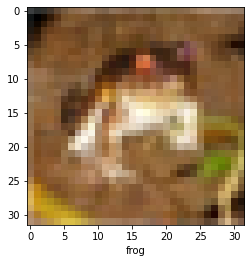

In [9]:
plt.imshow(X_train[0])
plt.xlabel(classes[int(y_train[0][0])])

In [10]:
# one-hot encoding

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [12]:
# normalize input data

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Train and Evaluate A CNN Model

In [13]:
input_shape = (32, 32, 3)

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [16]:
opt = RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
epochs = 10
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 27s 16ms/step - loss: 1.8151 - accuracy: 0.3341 - val_loss: 1.5294 - val_accuracy: 0.4357
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5021 - accuracy: 0.4527 - val_loss: 1.3666 - val_accuracy: 0.5059
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3589 - accuracy: 0.5111 - val_loss: 1.2618 - val_accuracy: 0.5528
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2593 - accuracy: 0.5517 - val_loss: 1.1394 - val_accuracy: 0.5933
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1801 - accuracy: 0.5823 - val_loss: 1.1533 - val_accuracy: 0.5950
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1139 - accuracy: 0.6091 - val_loss: 1.0374 - val_accuracy: 0.6343
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0585 - accuracy: 0.6271 - val_loss: 1.0682 -

In [18]:
# save model

model.save('./cnn_model.h5')

In [19]:
# evaluate: output loss and accuracy scores

scores = model.evaluate(X_test, y_test)
print(f"Test loss: {scores[0]}\nTest accuracy: {scores[1]}")

313/313 [==============================] - 2s 6ms/step - loss: 0.8902 - accuracy: 0.6889
Test loss: 0.8901856541633606
Test accuracy: 0.6888999938964844


Predicted X_test[1]: ship


Text(0.5, 0, 'ship')

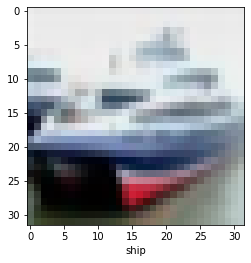

In [20]:
# predict: output predicted class indices, not scores

y_pred = model.predict(X_test)

predicted_index = np.argmax(y_pred[1])
predicted_class = classes[predicted_index]
print(f"Predicted X_test[1]: {predicted_class}")

plt.imshow(X_test[1])
plt.xlabel(classes[np.argmax(y_test[1])])

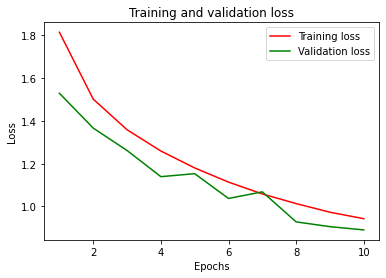

In [21]:
# plot losses

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

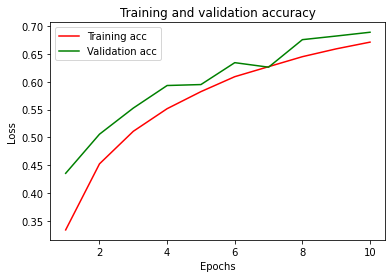

In [22]:
# plot accuracies

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Hyperparameter Optimization

We'll optimize on:
- Input layer node, with a range of 32 and 256, 32 steps at a time.
- Number of CNN layers after the first layer.
- Dropout value at the last CNN layer.
- Learning rate.

In [23]:
def build_model(hp):
  """Build a CNN model with hyperparameter optimization ranges."""

  model = Sequential()

  model.add(Conv2D(hp.Int('input_units', min_value=32, max_value=256, step=32), 
                   (3, 3), padding='same', input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  for i in range(hp.Int('n_layers', 1, 4)):
    model.add(Conv2D(hp.Int(f'conv_{i}_units', min_value=32, 
                            max_value=256, step=32), 
                   (3, 3), padding='same'))
    model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(hp.Choice('dropout_val', values=[0.0, 0.25, 0.50])))

  model.add(Flatten())
  for i in range(hp.Int('n_connections', 1, 4)):
    model.add(Dense(hp.Choice(f'dense_{i}_units', 
                              values=[128, 256, 512, 1024])))
    model.add(Activation('relu'))
  
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  model.compile(optimizer=RMSprop(learning_rate=0.00001, decay=1e-6),
      loss='categorical_crossentropy',
      metrics=['accuracy'])
  
  return model



```
# This is formatted as code
```

Set config for the tuner.
https://keras-team.github.io/keras-tuner/documentation/tuners/#randomsearch-class

In [24]:
tuner = RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=3,  # how many variations to test
    #executions_per_trial=1,  # how many trials per variation
    #directory='random_search',
    #project_name='cifar10'
)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [25]:
tuner.search_space_summary()

Search space summary
Default search space size: 9
input_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
conv_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
dropout_val (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.25, 0.5], 'ordered': True}
n_connections (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
dense_0_units (Choice)
{'default': 128, 'conditions': [], 'values': [128, 256, 512, 1024], 'ordered': True}
conv_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
conv_2_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
dense_1_units (Choice)
{'default'

Tune hyperparameters using random search.

In [26]:
epochs = 10
batch_size = 32

tuner.search(x=X_train, y=y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

print(tuner.get_best_models()[0].summary())
print(tuner.get_best_hyperparameters()[0].values)

INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        147520    
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 160)       92320     
_________________________________________________________________
activation_2 (Acti

In [27]:
model = tuner.get_best_models(num_models=1)[0]
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        147520    
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 160)       92320     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 160)       0

In [28]:
# Show a summary of the search

tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 256
n_layers: 3
conv_0_units: 64
dropout_val: 0.5
n_connections: 1
dense_0_units: 1024
conv_1_units: 160
conv_2_units: 192
dense_1_units: 256
Score: 0.6071000099182129
Trial summary
Hyperparameters:
input_units: 128
n_layers: 2
conv_0_units: 64
dropout_val: 0.5
n_connections: 2
dense_0_units: 256
conv_1_units: 160
conv_2_units: 128
dense_1_units: 128
Score: 0.551800012588501
Trial summary
Hyperparameters:
input_units: 96
n_layers: 3
conv_0_units: 96
dropout_val: 0.25
n_connections: 1
dense_0_units: 512
conv_1_units: 32
conv_2_units: 32
Score: 0.5214999914169312


# Evaluate Outcome

In [29]:
scores = model.evaluate(X_test, y_test)
print(f"Test loss: {scores[0]}\nTest accuracy: {scores[1]}")

model.save('./cnn_model_hp-best.h5')

313/313 [==============================] - 3s 9ms/step - loss: 1.1084 - accuracy: 0.6071
Test loss: 1.1084429025650024
Test accuracy: 0.6071000099182129
